In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.style.use('default')
sns.set_palette("husl")

## Load Dataset

In [30]:
print("\nSTEP 1: Loading the Dataset")
print("-" * 30)

df = pd.read_csv('..\data\WA_Fn-UseC_-Telco-Customer-Churn.csv')
print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape} (rows, columns)")


STEP 1: Loading the Dataset
------------------------------
Dataset loaded successfully!
Dataset shape: (7043, 21) (rows, columns)


## Exploratory Data Analysis (EDA)

In [29]:
print("\nSTEP 2: First Look at the Data")
print("-" * 35)

print("\n🔸 First 5 rows:")
print(df.head())  # Display the first 5 rows

print("\n🔸 Column names and data types:")
print(df.info())  # Display column names and data types

print("\n🔸 Basic statistics for numerical columns:")
print(df.describe())  # Display basic statistics for numerical columns


STEP 2: First Look at the Data
-----------------------------------

🔸 First 5 rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ..

### Target Variable(Churn)

In [28]:
print("\nSTEP 3: Understanding Our Target Variable")
print("-" * 45)

# Check the churn distribution
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

print("Churn Distribution:")
print(f"No:  {churn_counts['No']} customers ({churn_percentage['No']:.1f}%)")
print(f"Yes: {churn_counts['Yes']} customers ({churn_percentage['Yes']:.1f}%)")


STEP 3: Understanding Our Target Variable
---------------------------------------------
Churn Distribution:
No:  5174 customers (73.5%)
Yes: 1869 customers (26.5%)


### Handling missing values and duplicate values

In [27]:
print("\nSTEP 4: Data Quality Assessment")
print("-" * 35)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
for col, missing in missing_values.items():
    if missing > 0:
        print(f"  {col}: {missing} ({missing/len(df)*100:.1f}%)")
    
if missing_values.sum() == 0:
    print("No missing values found!")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")


STEP 4: Data Quality Assessment
-----------------------------------
Missing values per column:
  TotalCharges: 11 (0.2%)

Duplicate rows: 0


In [24]:
print("\nSTEP 5: Data Type Corrections")
print("-" * 32)

# Check if TotalCharges is numeric (common issue with this dataset)
print(f"TotalCharges data type: {df['TotalCharges'].dtype}")

# Try to convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for any values that couldn't be converted
non_numeric_charges = df['TotalCharges'].isnull().sum()
if non_numeric_charges > 0:
    print(f"Found {non_numeric_charges} non-numeric values in TotalCharges")
    print("These will be handled in data cleaning phase")


STEP 5: Data Type Corrections
--------------------------------
TotalCharges data type: float64
Found 11 non-numeric values in TotalCharges
These will be handled in data cleaning phase


### Visualization


STEP 6: Visualization
------------------------------------------


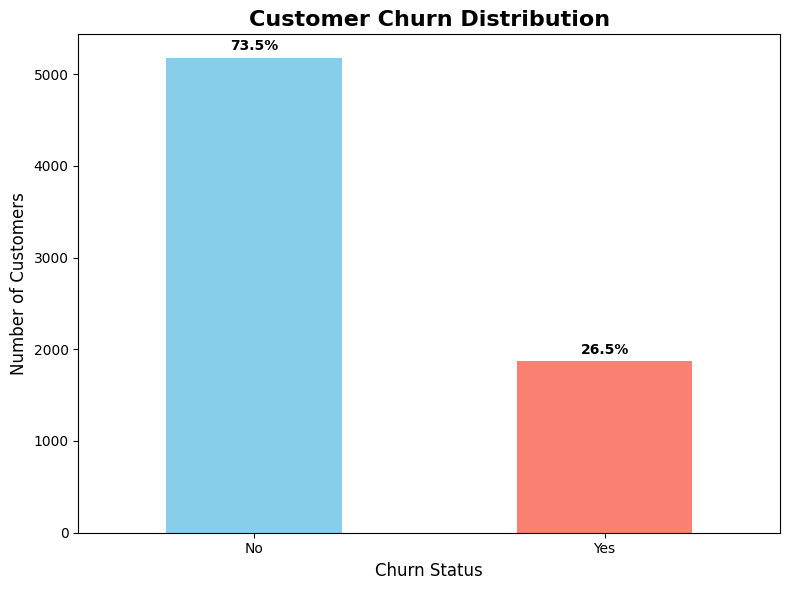

In [ ]:
print("\nSTEP 6: Visualization")
print("-" * 42)

# Create a simple bar plot for churn distribution
plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Customer Churn Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)

# Add percentage labels on bars
for i, v in enumerate(churn_counts.values):
    plt.text(i, v + 50, f'{churn_percentage.iloc[i]:.1f}%', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


### Summary

In [26]:
print("\nSTEP 7: Initial Findings Summary")
print("-" * 35)
print(f"Dataset Overview:")
print(f"• Total customers: {len(df):,}")
print(f"• Features available: {len(df.columns)}")
print(f"• Churn rate: {churn_percentage['Yes']:.1f}%")
print(f"• Data quality: {'Good' if missing_values.sum() == 0 else 'Needs attention'}")



STEP 7: Initial Findings Summary
-----------------------------------
Dataset Overview:
• Total customers: 7,043
• Features available: 21
• Churn rate: 26.5%
• Data quality: Good
